# Output variable -> y, y -> Whether the client has subscribed a term deposit or not Binomial ("yes" or "no").

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [5]:
# load the Data set
bank=pd.read_csv("F:/ExcelR workings/Assignments/Logistic Regression/bank-full.csv", sep=';')

In [6]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
Bank=bank.copy()

In [10]:
bank.shape

(45211, 17)

### Droping the some columns as it is not required. 

In [23]:
bank.drop('job',inplace=True,axis=1)

In [24]:
bank.drop('contact',inplace=True,axis=1)

In [25]:
bank.drop('day',inplace=True,axis=1)

In [26]:
bank.drop('month',inplace=True,axis=1)

In [27]:
bank.drop('campaign',inplace=True,axis=1)

In [28]:
bank.drop('pdays',inplace=True,axis=1)

In [29]:
bank.drop('poutcome',inplace=True,axis=1)

In [30]:
bank.drop('previous',inplace=True,axis=1)

In [15]:
bank.marital.replace(('single','married','divorced'),(0,1,2),inplace=True)

In [16]:
bank.education.replace(('unknown','primary','secondary','tertiary'),(0,1,2,3),inplace=True)

In [17]:
bank.default.replace(('yes','no'),(1,0),inplace=True)

In [18]:
bank.housing.replace(('yes','no'),(1,0),inplace=True)

In [19]:
bank.loan.replace(('yes','no'),(1,0),inplace=True)

In [20]:
bank.y.replace(('yes','no'),(1,0),inplace=True)

In [31]:
bank.head()

,age,marital,education,default,balance,housing,loan,duration,y
0,58,1,3,0,2143,1,0,261,0
1,44,0,2,0,29,1,0,151,0
2,33,1,2,0,2,1,1,76,0
3,47,1,0,0,1506,1,0,92,0
4,33,0,0,0,1,0,0,198,0


In [34]:
#Dividing our data into input and output variables 
X=bank.iloc[:,0:8]
Y=bank.iloc[:,-1]

In [35]:
# logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\sanjaysagar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Predict for X dataset
y_pred=classifier.predict(X)

In [37]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [38]:
y_pred_df=pd.DataFrame({'actual': Y, 'predicted_prob': classifier.predict(X)}) 

In [39]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [40]:
# Confusion Matrix for the model accuracy
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[39198   724]
 [ 4383   906]]


In [41]:
((39198+906)/(39198+724+4383+908))*100

88.70015261097473

In [49]:
#classification report 
classification_report=classification_report(Y,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.56      0.17      0.26      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.58      0.60     45211
weighted avg       0.86      0.89      0.86     45211



# ROC curve

In [45]:
fpr, tpr, thresholds =roc_curve(Y,classifier.predict_proba(X)[:,1])
auc = roc_auc_score (Y,y_pred)

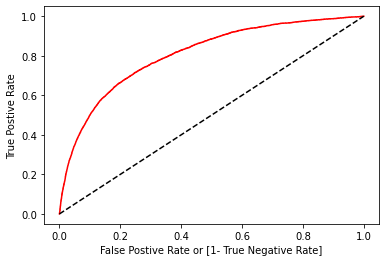

In [46]:
plt.plot(fpr,tpr, color ='red',label='logit model(area =%0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Postive Rate or [1- True Negative Rate]')
plt.ylabel('True Postive Rate')
plt.show()

In [47]:
auc

0.5765817791659135